# Car pricing project

## Phase 2: Exploratory Data Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
sns.set(style='darkgrid')

In [2]:
df1 = pd.read_csv('autos_clean.csv')

In [3]:
df1.head()

,Unnamed: 0,name,seller,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,1,A5_Sportback_2.7_Tdi,privat,18300.0,coupe,2011.0,manuell,190,a5,125000,5,diesel,audi,ja
1,3,GOLF_4_1_4__3TÜRER,privat,1500.0,kleinwagen,2001.0,manuell,75,golf,150000,6,benzin,volkswagen,nein
2,4,Skoda_Fabia_1.4_TDI_PD_Classic,privat,3600.0,kleinwagen,2008.0,manuell,69,fabia,90000,7,diesel,skoda,nein
3,5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,650.0,limousine,1995.0,manuell,102,3er,150000,10,benzin,bmw,ja
4,6,Peugeot_206_CC_110_Platinum,privat,2200.0,cabrio,2004.0,manuell,109,2_reihe,150000,8,benzin,peugeot,nein


In [4]:
df1.drop(['name', 'Unnamed: 0'], inplace=True, axis=1)

In [5]:
df1[['price', 'yearOfRegistration']] = df1[['price', 'yearOfRegistration']].astype(int)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279316 entries, 0 to 279315
Data columns (total 12 columns):
seller                 279316 non-null object
price                  279316 non-null int64
vehicleType            279316 non-null object
yearOfRegistration     279316 non-null int64
gearbox                279316 non-null object
powerPS                279316 non-null int64
model                  279316 non-null object
kilometer              279316 non-null int64
monthOfRegistration    279316 non-null int64
fuelType               279316 non-null object
brand                  279316 non-null object
notRepairedDamage      279316 non-null object
dtypes: int64(5), object(7)
memory usage: 25.6+ MB


In [7]:
df1.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,2.793160e+05,279316.000000,279316.000000,279316.000000,279316.000000
mean,1.607632e+04,2003.658759,123.925368,124694.002492,6.112468
std,4.081362e+06,6.010843,164.400713,39551.816082,3.520814
min,1.000000e+02,1980.000000,0.000000,5000.000000,0.000000
25%,1.500000e+03,1999.000000,75.000000,100000.000000,3.000000
50%,3.650000e+03,2004.000000,115.000000,150000.000000,6.000000
75%,8.350000e+03,2008.000000,150.000000,150000.000000,9.000000
max,2.147484e+09,2016.000000,20000.000000,150000.000000,12.000000


### Narrowing down the data set to reg 2000-2016

In [44]:
df2 = df1.copy()

In [45]:
df2.drop(df2[df2['yearOfRegistration']<2000].index, inplace=True)

In [46]:
df2.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,2.092400e+05,209240.000000,209240.000000,209240.000000,209240.000000
mean,9.293411e+03,2006.231806,130.960156,119777.814949,6.184535
std,3.145223e+05,4.210693,161.520831,41696.310317,3.477102
min,1.000000e+02,2000.000000,0.000000,5000.000000,0.000000
25%,2.500000e+03,2003.000000,83.000000,90000.000000,3.000000
50%,5.200000e+03,2006.000000,120.000000,150000.000000,6.000000
75%,1.000000e+04,2009.000000,163.000000,150000.000000,9.000000
max,1.000000e+08,2016.000000,19208.000000,150000.000000,12.000000


### Dealing with outliers: price

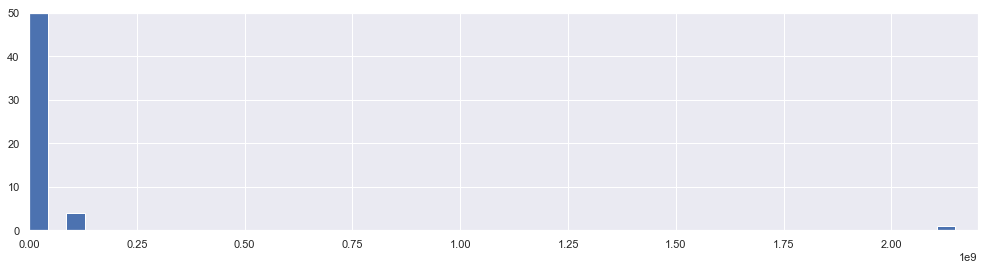

In [47]:
plt.figure(figsize=(17,4))
plt.axis([0, 2200000000, 0, 50])
df1['price'].hist(bins=50)

In [107]:
len(df2[df2['price']>=100000])

0

In [98]:
df2.drop(df2[df2['price']>=100000].index, inplace=True)

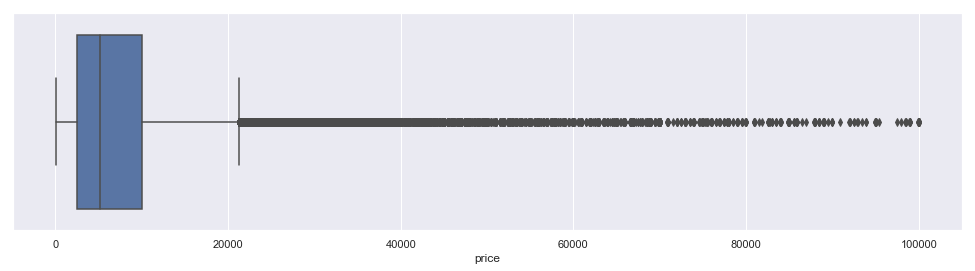

In [104]:
plt.figure(figsize=(17,4))
sns.boxplot(df2['price'])

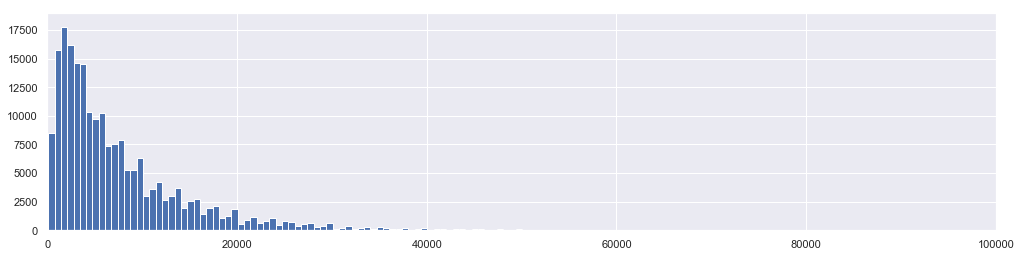

In [105]:
plt.figure(figsize=(17,4))
plt.axis([0, 100000, 0, 19000])
df2['price'].hist(bins=150)

### Dealing with outliers: power

In [73]:
# Count observations with BHP above 600 (unrealistic)
len(df2[df2['powerPS']>=600])

176

In [74]:
# Count observations with BHP = 0 (missing info)
len(df2[df2['powerPS']==0])

9734

In [76]:
# Replace those outliers with null values
df2['powerPS'].replace(0, np.nan, inplace=True)
df2['powerPS'].replace(range(600,200000), np.nan, inplace=True)
df2['powerPS'].isnull().sum(axis=0)

9910

In [77]:
# Get mean power by car model
bymodel = df2[['model', 'powerPS']].dropna()
pivot = bymodel.pivot_table(index='model', values='powerPS', aggfunc='mean', fill_value=0)
pivot.head()

,powerPS
model,
100,136.714286
107,63.500000
145,105.333333
147,121.424176
156,151.926121


In [78]:
# Create a dictionary
d_upper = pivot.to_dict()
d = d_upper['powerPS']

# Fill empty powerPS with mean by model
df2['powerPS'] = df2['powerPS'].fillna(df2['model'].map(d))
df2['powerPS'].isnull().sum(axis=0)

2

In [79]:
# Remove the remaining 2 observations
df2.dropna(subset=['powerPS'], inplace=True)

In [80]:
len(df2)

209060

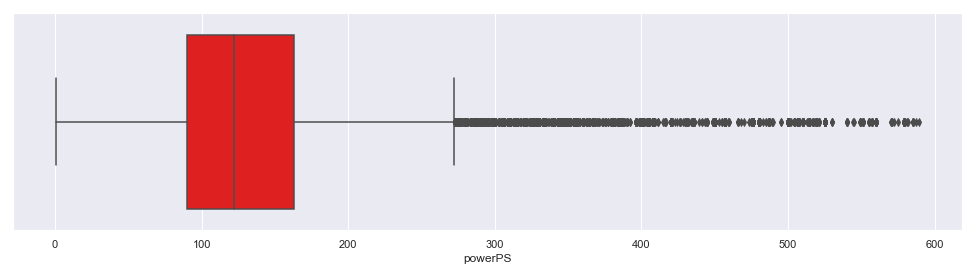

In [81]:
plt.figure(figsize=(17,4))
sns.boxplot(df2['powerPS'], color='red')

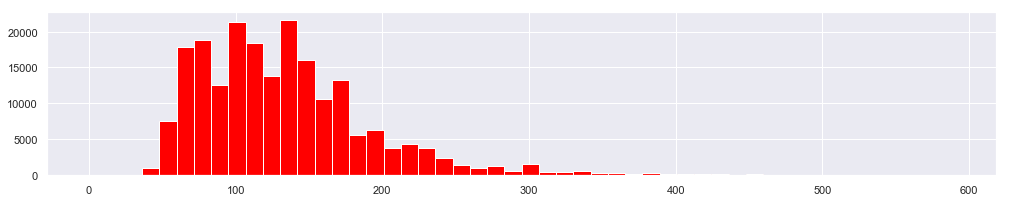

In [82]:
plt.figure(figsize=(17,3))
df2['powerPS'].hist(bins=50, color='red')

### Visual analysis

In [ ]:
plt.scatter()

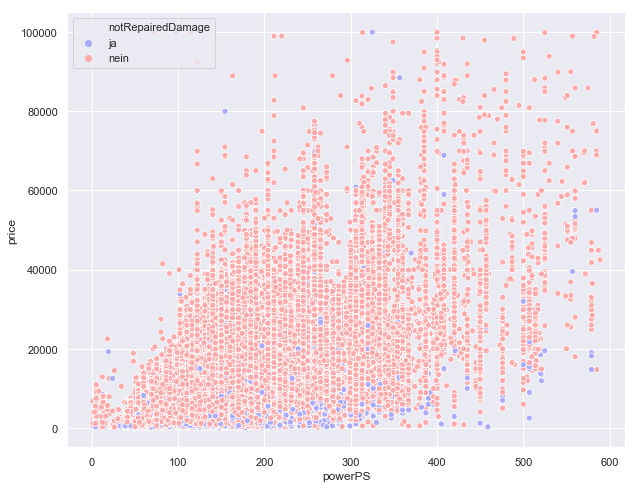

In [132]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df2, x='powerPS', y='price', hue='notRepairedDamage', palette='bwr')

<Figure size 864x576 with 0 Axes>

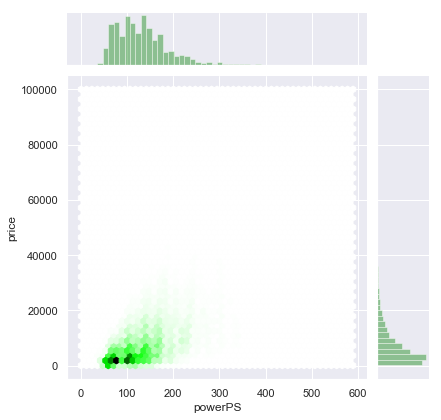

In [126]:
plt.figure(figsize=(12,8))
g = sns.jointplot(data=df2, x='powerPS', y='price', kind='hex', color='green')

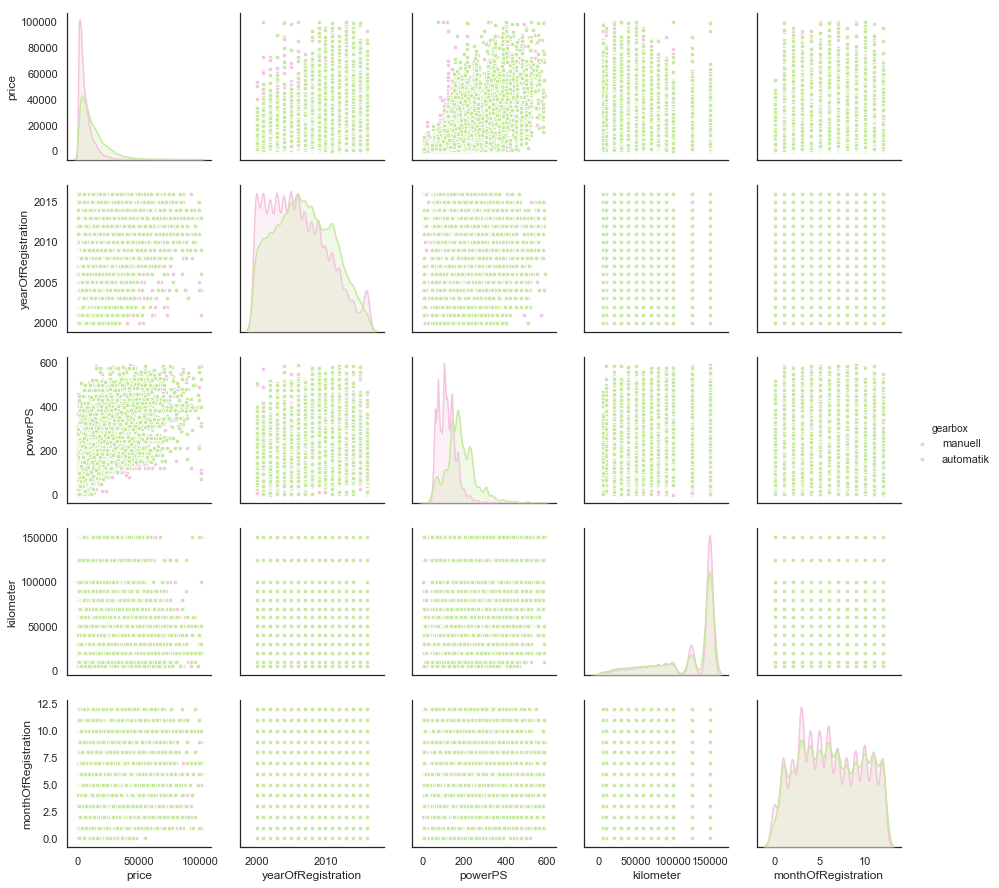

In [141]:
sns.set(style="white")
sns.pairplot(data=df2, hue='gearbox', plot_kws={"s":20}, palette='PiYG')

In [22]:
df2.isnull().sum(axis=0)

seller                 0
price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

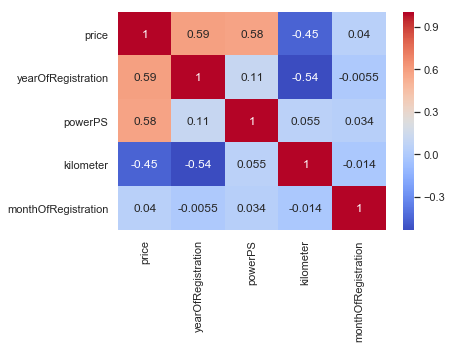

In [42]:
sns.heatmap(df2.corr(), cmap='coolwarm', annot=True)

In [ ]:
sns.violinplot(data=df1, x='kilometer')

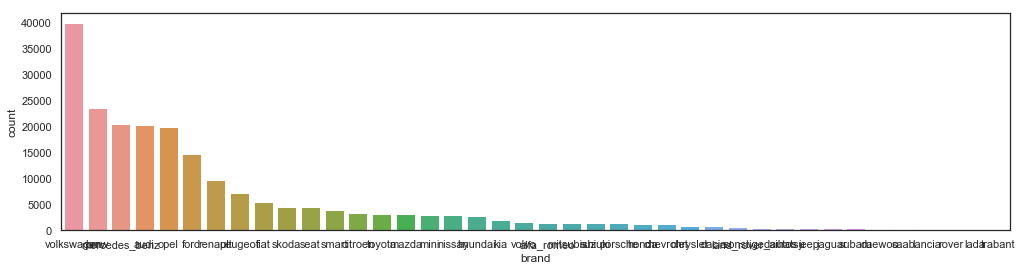

In [142]:
plt.figure(figsize=(17,4))
sns.countplot(df2['brand'], order=df2['brand'].value_counts().index)

In [139]:
df2.to_csv('autos_forML.csv')

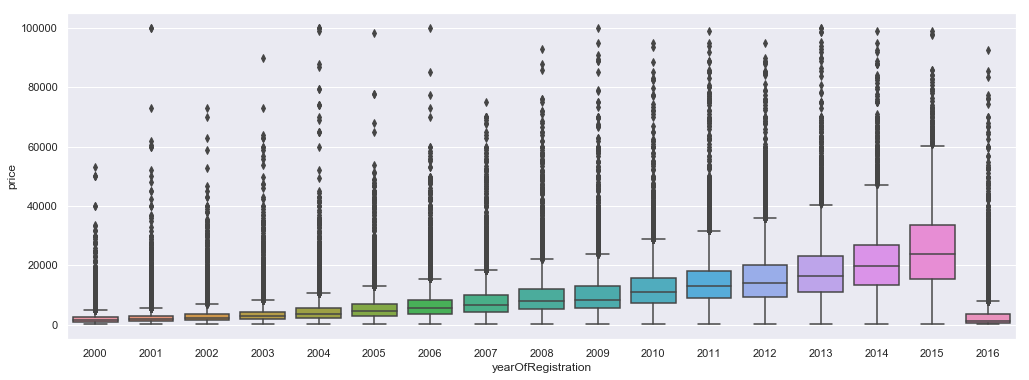

In [140]:
sns.set(style="darkgrid")
plt.figure(figsize=(17,6))
sns.boxplot(data=df2, x='yearOfRegistration', y='price')

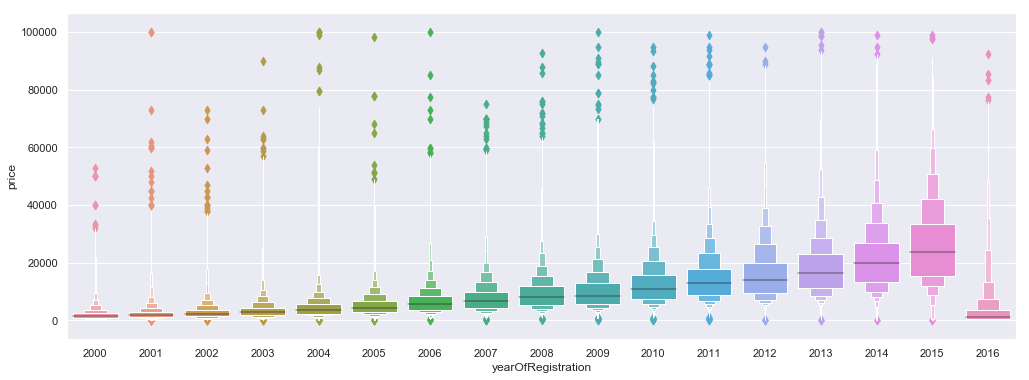

In [147]:
sns.set(style="darkgrid")
plt.figure(figsize=(17,6))
sns.boxenplot(data=df2, x='yearOfRegistration', y='price')
plt.show()

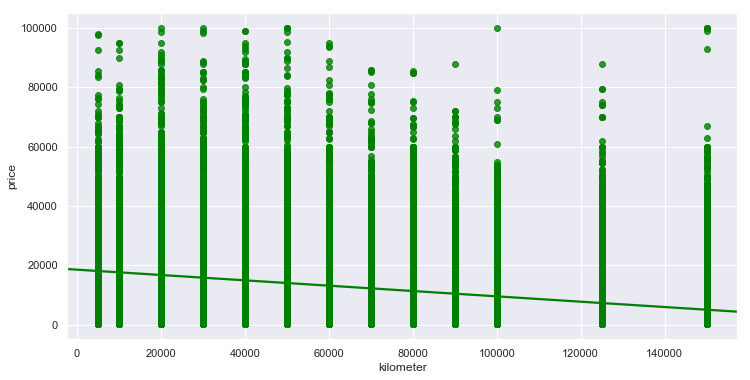

In [150]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
sns.regplot(data=df2, x='kilometer', y='price', color='green')